In [1]:
import bs4 as bs
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import requests

page = requests.get('https://www.worldometers.info/coronavirus/')

soup = bs.BeautifulSoup(page.text, 'html.parser')
print(soup.title.text)
# print(soup.find_all('p'))

htmltable = soup.find_all('table', { 'id' : 'main_table_countries_today' })
df = pd.read_html(str(htmltable))[0]

Coronavirus Update (Live): 1,018,536 Cases and 53,280 Deaths from COVID-19 Virus Outbreak - Worldometer


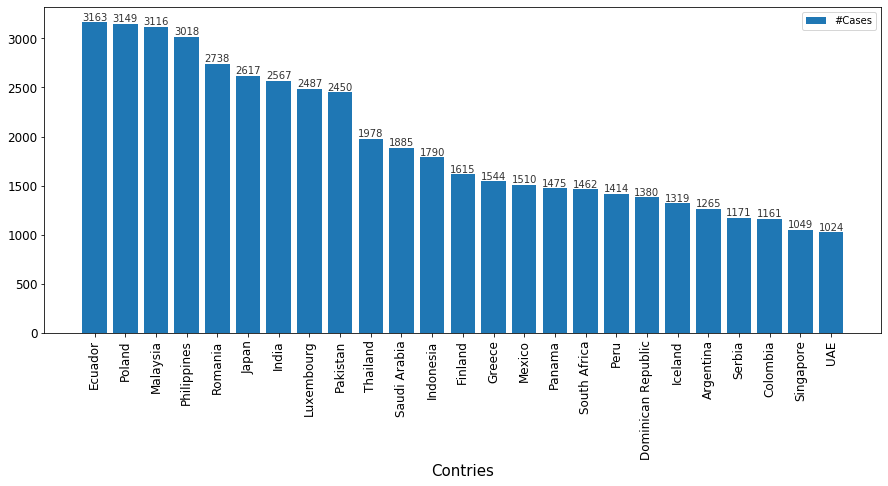

In [3]:
df1 = df.iloc[25:50,:]
plt.figure(figsize=(15,6))
plt.bar(df1['Country,Other'],df1['TotalCases'], label = '#Cases')
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 12)
plt.xlabel('Contries', size = 15)
for i, j in enumerate(df1['TotalCases']):
    plt.text(i,j, s=j, fontdict=dict(fontsize=10), ha='center', verticalalignment='bottom', alpha=0.8)
# plt.xaxis.label.('c')

# xaxis.get_ticklabels.set_rotation(45)
plt.legend()
plt.show()
# plt.xticks?
# df[df['Country,Other']=='India']

In [4]:
import json
import requests
import pandas as pd

request = requests.get('https://raw.githubusercontent.com/covid19india/api/master/raw_data.json')
r_text = request.text


data = json.loads(r_text)
print(type(data))
data_serialized = json.dumps(data)
print(type(data_serialized))
data1 = data['raw_data']
print(type(data1))
# data1
# df = pd.DataFrame(list(data1.items()),columns = ['column1','column2']) 
# df
# l = []
# for i in data1:
#     for p,q in i.items():
#         l.append(q)
        
df = pd.DataFrame(data1) 
df.head()

<class 'dict'>
<class 'str'>
<class 'list'>


,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [5]:
print(df.index)
# print(df.tail(40))
last = df[df['currentstatus'] == ''].index[0]
df = df.iloc[0:last,:]
df.tail()

RangeIndex(start=0, stop=3012, step=1)


,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
2634,,,,Hospitalized,03/04/2020,,Gurugram,Haryana,,,,,2635,http://www.nhmharyana.gov.in/WriteReadData/use...,,,HR,,03/04/2020,
2635,,,,Hospitalized,03/04/2020,,Gurugram,Haryana,,,,,2636,http://www.nhmharyana.gov.in/WriteReadData/use...,,,HR,,03/04/2020,
2636,,,,Hospitalized,03/04/2020,,Nuh,Haryana,,,,Belongs to Kerala,2637,http://www.nhmharyana.gov.in/WriteReadData/use...,,,HR,,03/04/2020,
2637,,,,Hospitalized,03/04/2020,,Nuh,Haryana,,,,Belongs to Kerala,2638,http://www.nhmharyana.gov.in/WriteReadData/use...,,,HR,,03/04/2020,
2638,,,,Hospitalized,03/04/2020,,Nuh,Haryana,,,,Belongs to Kerala,2639,http://www.nhmharyana.gov.in/WriteReadData/use...,,,HR,,03/04/2020,


In [7]:
df['dateannounced'] = pd.to_datetime(df['dateannounced'], format = '%d/%m/%Y')
# print(df['dateannounced'].dtype)
df['datetimestr'] = df['dateannounced'].dt.strftime('%m-%d')
df

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,...,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission,datetimestr
0,20,Student from Wuhan,,Recovered,2020-01-30,Thrissur,Thrissur,Kerala,,F,...,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported,01-30
1,,Student from Wuhan,,Recovered,2020-02-02,Alappuzha,Alappuzha,Kerala,,,...,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported,02-02
2,,Student from Wuhan,,Recovered,2020-02-03,Kasaragod,Kasaragod,Kerala,,,...,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported,02-03
3,45,Travel history to Italy and Austria,,Recovered,2020-03-02,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,...,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported,03-02
4,24,"Travel history to Dubai, Singapore contact",,Recovered,2020-03-02,Hyderabad,Hyderabad,Telangana,,M,...,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported,03-02
5,69,Italian tourist,,Recovered,2020-03-03,Jaipur,Jaipur,Rajasthan,,M,...,Travelled from Italy,6,https://indianexpress.com/article/india/corona...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...,RJ,,03/03/2020,Imported,03-03
6,55,Italian tourist,P6,Recovered,2020-03-04,Gurugram,Gurugram,Haryana,,,...,Travelled from Italy,7,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,,HR,,29/03/2020,Imported,03-04
7,55,Italian tourist,P6,Recovered,2020-03-04,Gurugram,Gurugram,Haryana,,,...,Travelled from Italy,8,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,,HR,,29/03/2020,Imported,03-04
8,55,Italian tourist,P6,Recovered,2020-03-04,Gurugram,Gurugram,Haryana,,,...,Travelled from Italy,9,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,,HR,,29/03/2020,Imported,03-04
9,55,Italian tourist,P6,Recovered,2020-03-04,Gurugram,Gurugram,Haryana,,,...,Travelled from Italy,10,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,,HR,,29/03/2020,Imported,03-04


In [8]:
df.describe()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,...,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission,datetimestr
count,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639,...,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639
unique,81,223,109,4,36,232,210,30,1,3,...,584,2639,513,260,79,30,617,34,4,36
top,,,,Hospitalized,2020-04-02 00:00:00,,,Maharashtra,,,...,Details awaited,856,https://twitter.com/NHM_TN/status/124533236456...,,,MH,,02/04/2020,,04-02
freq,1871,2278,1927,2545,486,1820,697,423,2639,1719,...,592,1,110,1683,2484,423,2018,488,875,486
first,NaN,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-03 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 21 columns):
agebracket                             2639 non-null object
backupnotes                            2639 non-null object
contractedfromwhichpatientsuspected    2639 non-null object
currentstatus                          2639 non-null object
dateannounced                          2639 non-null datetime64[ns]
detectedcity                           2639 non-null object
detecteddistrict                       2639 non-null object
detectedstate                          2639 non-null object
estimatedonsetdate                     2639 non-null object
gender                                 2639 non-null object
nationality                            2639 non-null object
notes                                  2639 non-null object
patientnumber                          2639 non-null object
source1                                2639 non-null object
source2                                2639 n

In [10]:
df.isnull().sum()

agebracket                             0
backupnotes                            0
contractedfromwhichpatientsuspected    0
currentstatus                          0
dateannounced                          0
detectedcity                           0
detecteddistrict                       0
detectedstate                          0
estimatedonsetdate                     0
gender                                 0
nationality                            0
notes                                  0
patientnumber                          0
source1                                0
source2                                0
source3                                0
statecode                              0
statepatientnumber                     0
statuschangedate                       0
typeoftransmission                     0
datetimestr                            0
dtype: int64

In [11]:
import numpy as np
np.unique(df['agebracket'])

array(['', '1', '10', '11', '12', '13', '14', '15', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '28-35',
       '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7',
       '70', '71', '72', '73', '74', '75', '76', '77', '78', '81', '85',
       '89', '9', '92', '96'], dtype=object)

In [12]:
df.replace(r'^\s*$', np.nan, regex = True, inplace = True)

In [13]:
df['agebracket'] = pd.to_numeric(df['agebracket'], errors='coerce')
df.dtypes

agebracket                                    float64
backupnotes                                    object
contractedfromwhichpatientsuspected            object
currentstatus                                  object
dateannounced                          datetime64[ns]
detectedcity                                   object
detecteddistrict                               object
detectedstate                                  object
estimatedonsetdate                            float64
gender                                         object
nationality                                    object
notes                                          object
patientnumber                                  object
source1                                        object
source2                                        object
source3                                        object
statecode                                      object
statepatientnumber                             object
statuschangedate            

In [15]:
# plt.hist(df['agebracket'], bins = 7)
# plt.show()

In [26]:
df_2 = pd.pivot_table(df.fillna('N/A'), values = ['patientnumber'], columns = ['currentstatus'], index = ['detectedstate'],aggfunc='count', margins=True)
df_2.fillna(0).astype(int)

patientnumber                                  \
currentstatus                    Deceased Hospitalized Migrated Recovered   
detectedstate                                                               
Andaman and Nicobar Islands             0           10        0         0   
Andhra Pradesh                          0          159        0         2   
Arunachal Pradesh                       0            1        0         0   
Assam                                   0           16        0         0   
Bihar                                   1           28        0         0   
Chandigarh                              0           18        0         0   
Chhattisgarh                            0            9        0         0   
Delhi                                   1          289        1         2   
Goa                                     0            6        0         0   
Gujarat                                 3           91        0         1   
Haryana                                 0           45        0        12   
Himachal Pradesh                        1            4        0         1   
Jammu and Kashmir                       1           69        0         0   
Jharkhand                               0            2        0         0   
Karnataka                               3          111        0        11   
Kerala                                  2          256        0        28   
Ladakh                                  0           13        0         0   
Madhya Pradesh                          2          105        0         0   
Maharashtra                             2          419        0         2   
Manipur                                 0            2        0         0   
Mizoram                                 0            1        0         0   
Odisha                                  0            5        0         0   
Puducherry                              0            5        0         0   
Punjab                                  1           46        0         0   
Rajasthan                               0          151        0         3   
Tamil Nadu                              1          306        0         2   
Telangana                               1          152        0         1   
Uttar Pradesh                           0          170        0         2   
Uttarakhand                             0            9        0         1   
West Bengal                             3           47        0         3   
All                                    22         2545        1        71   

                                   
currentstatus                 All  
detectedstate                      
Andaman and Nicobar Islands    10  
Andhra Pradesh                161  
Arunachal Pradesh               1  
Assam                          16  
Bihar                          29  
Chandigarh                     18  
Chhattisgarh                    9  
Delhi                         293  
Goa                             6  
Gujarat                        95  
Haryana                        57  
Himachal Pradesh                6  
Jammu and Kashmir              70  
Jharkhand                       2  
Karnataka                     125  
Kerala                        286  
Ladakh                         13  
Madhya Pradesh                107  
Maharashtra                   423  
Manipur                         2  
Mizoram                         1  
Odisha                          5  
Puducherry                      5  
Punjab                         47  
Rajasthan                     154  
Tamil Nadu                    309  
Telangana                     154  
Uttar Pradesh                 172  
Uttarakhand                    10  
West Bengal                    53  
All                          2639

In [19]:
df3 = df[df['detectedstate'] == 'Uttar Pradesh']
df4 = pd.pivot_table(df3.fillna('N/A'), values = ['patientnumber'], columns = ['typeoftransmission'], index = ['detecteddistrict'],aggfunc='count', margins=True)
df4.fillna(0).astype(int)

patientnumber                   
typeoftransmission       Imported Local N/A TBD  All
detecteddistrict                                    
Agra                            0     9   0   0    9
Baghpat                         1     0   0   0    1
Bareilly                        0     0   0   6    6
Gautam Buddha Nagar             6     8   0  20   34
Ghaziabad                       2     1   0   0    3
Jaunpur                         1     0   2   0    3
Kanpur Nagar                    1     0   0   0    1
Lucknow                         4     4   1   0    9
Meerut                          0     4   0   1    5
Moradabad                       1     0   0   0    1
N/A                             0     1  53  42   96
Pilibhit                        1     1   0   0    2
Varanasi                        1     0   0   1    2
All                            18    28  56  70  172

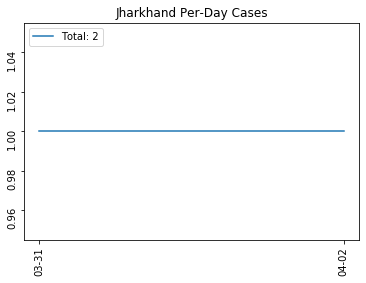

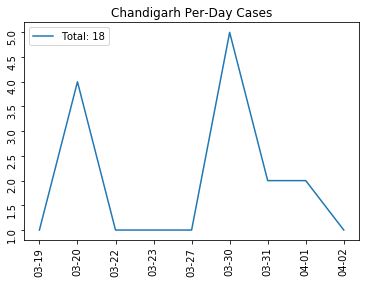

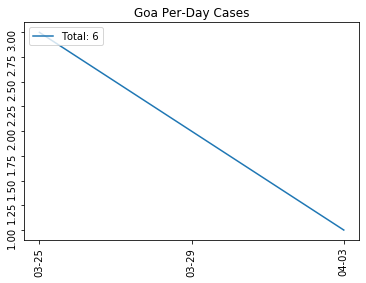

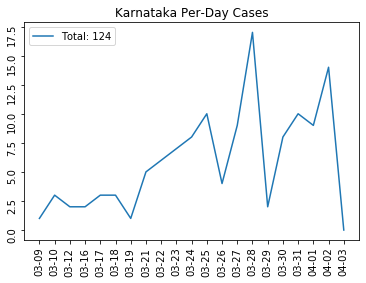

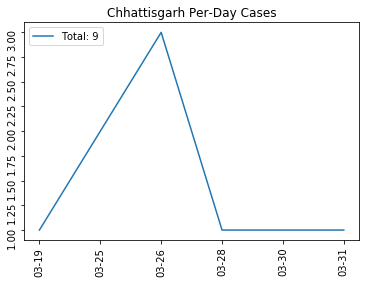

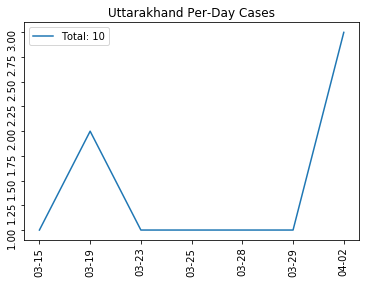

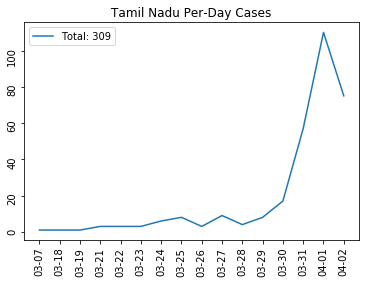

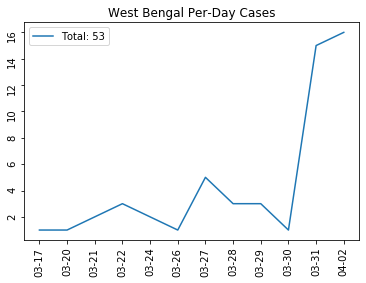

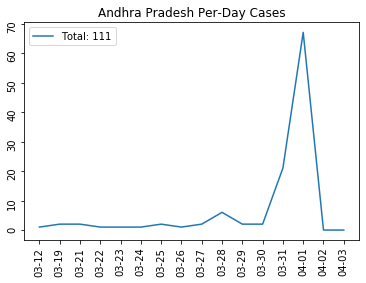

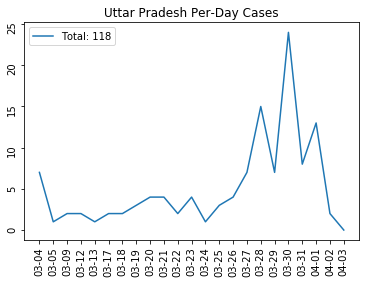

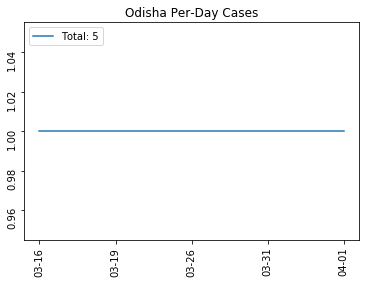

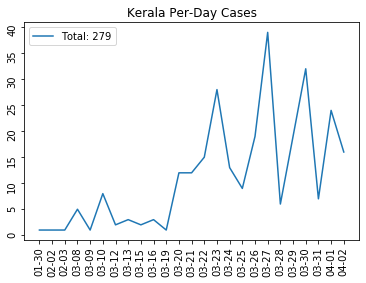

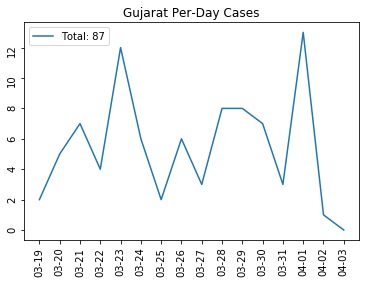

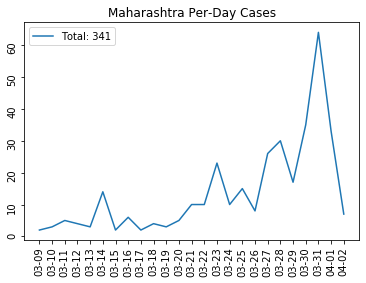

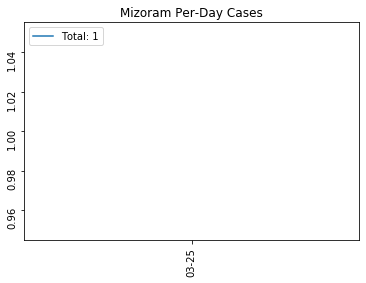

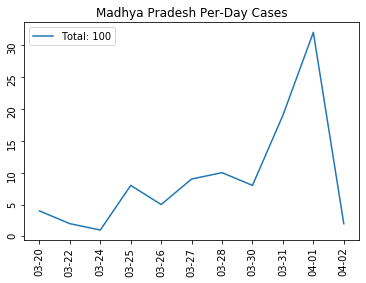

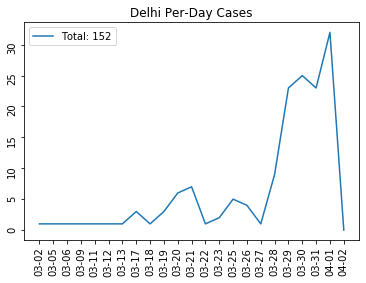

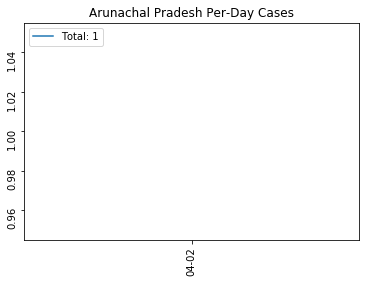

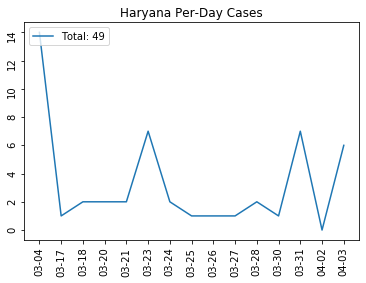

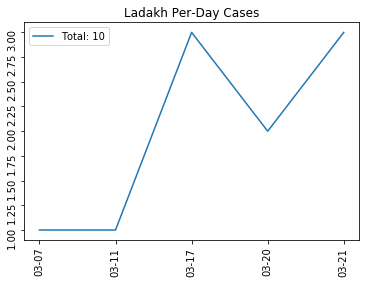

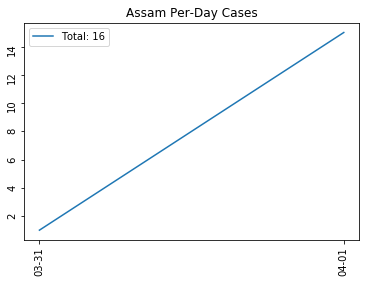

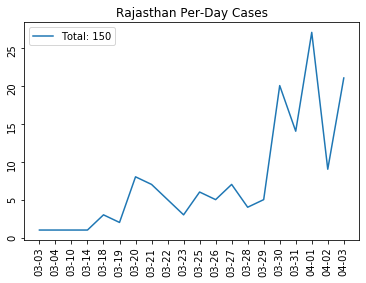

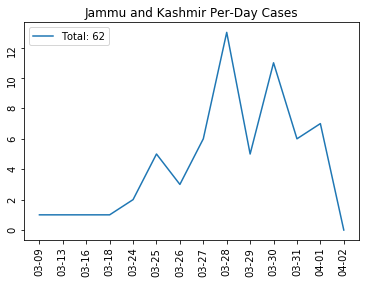

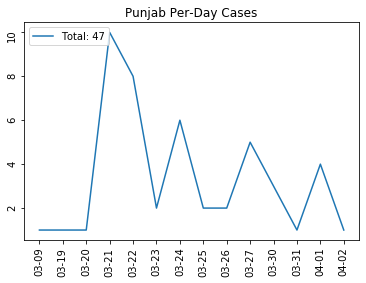

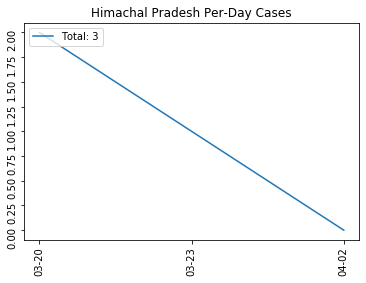

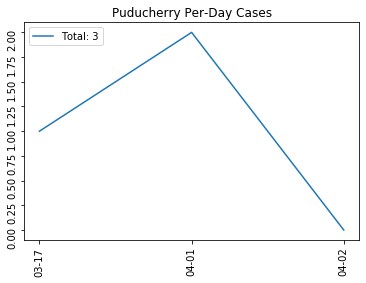

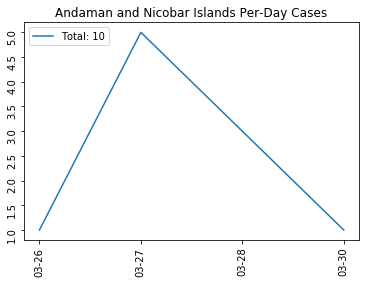

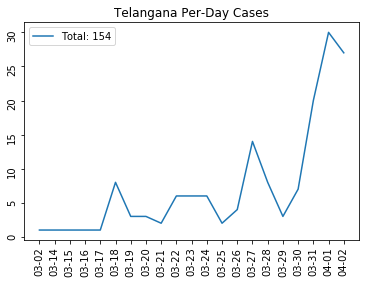

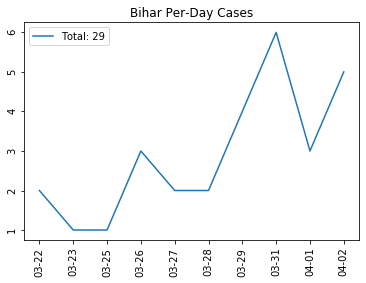

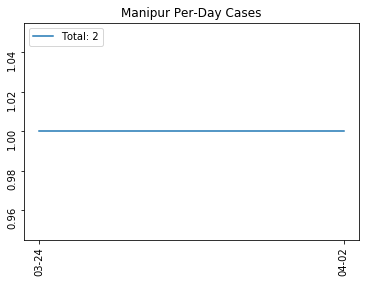

In [28]:
import matplotlib.pyplot as plt

l ={i for i in df.detectedstate}
# l1 = ['Chandigarh','Himachal Pradesh','Uttar Pradesh','Punjab','Delhi','Rajasthan','Haryana','Uttarakhand']

for i in l:
    df2 = df[df['detectedstate'] == i]
    df2 = df2.groupby('datetimestr').agg({'notes': 'count'})
    df2 = df2.reset_index()
    df2 = df2.sort_values('datetimestr', ascending = True)
    s = df2['notes'].sum()
    plt.plot(df2['datetimestr'], df2['notes'], label = f'Total: {s}')
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 90)
    plt.title(f'{i} Per-Day Cases')
    plt.legend(loc="upper left")
    plt.show()